In [1]:
import math
import random
from collections import defaultdict, Counter, deque
from typing import Tuple, List, Set, Dict, Counter
from typing import Any, Sequence, Mapping, Iterable, Iterator
from itertools import product, chain, islice
import doctest
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [28]:
class Player:
    """A player with real skill and obvservable elo.
    
    >>> Player('p1', '', '1000')  # test robustness
    Traceback (most recent call last):
        ...
    AssertionError: Must not be empty
    >>> playerA = Player('p1',1001, 1000)
    >>> playerA  # also tests __repr__()
    Player(1001, 1000)
    >>> playerA.update(10)
    >>> print(playerA)  # also tests __str__()
    (1001,1010)
    """
    def __init__(self,name:str, skill: int, elo:int) -> None:
        """Create player with given state.
        """
        assert name and skill and elo, "Must not be empty"
        self.skill: int = skill
        self.elo: int = elo
        self.name: str = name
            
    def __repr__(self) -> str:
        """Return machine-processable string representation of current state.
        """
        return f"Player({str(self.skill)}, {str(self.elo)})"
    
    def __str__(self) -> str:
        """Return human-readable string representation of current state.
        """
        return f"({self.skill},{self.elo})"
    
    def update(self, gain : int) -> None:
        """ Update the elo after a match"""
        self.elo = self.elo + gain

In [29]:
doctest.run_docstring_examples(Player, globals(), verbose=True, name="Player")  # with details

Finding tests in Player
Trying:
    Player('p1', '', '1000')  # test robustness
Expecting:
    Traceback (most recent call last):
        ...
    AssertionError: Must not be empty
ok
Trying:
    playerA = Player('p1',1001, 1000)
Expecting nothing
ok
Trying:
    playerA  # also tests __repr__()
Expecting:
    Player(1001, 1000)
ok
Trying:
    playerA.update(10)
Expecting nothing
ok
Trying:
    print(playerA)  # also tests __str__()
Expecting:
    (1001,1010)
ok


In [4]:
"""
def get_skill_r(indx: List(int), i: int ):
    "defines how much skill do we birth our players with"
    return random.randint(1, 2800)


def spawn_players(n: int):
    indx = [i for i in range(n)]
    for i in indx:    
        name = 'player' + str(indx(i))
        name = Player(get_skill(indx, i), 1000)
        
"""

'\ndef get_skill_r(indx: List(int), i: int ):\n    "defines how much skill do we birth our players with"\n    return random.randint(1, 2800)\n\n\ndef spawn_players(n: int):\n    indx = [i for i in range(n)]\n    for i in indx:    \n        name = \'player\' + str(indx(i))\n        name = Player(get_skill(indx, i), 1000)\n        \n'

In [30]:
p1 = Player('p1', random.randint(1,2800), 1000)
p2 = Player('p2', random.randint(1,2800), 1000)
p3 = Player('p3', random.randint(1,2800), 1000)
p4 = Player('p4', random.randint(1,2800), 1000)
p5 = Player('p5', random.randint(1,2800), 1000)
p6 = Player('p6', random.randint(1,2800), 1000)
p7 = Player('p7', random.randint(1,2800), 1000)
p8 = Player('p8', random.randint(1,2800), 1000)
p9 = Player('p9', random.randint(1,2800), 1000)
p10 = Player('p10', random.randint(1,2800), 1000)
p11 = Player('p11', random.randint(1,2800), 1000)
p12 = Player('p12', random.randint(1,2800), 1000)
p13 = Player('p13', random.randint(1,2800), 1000)
p14 = Player('p14', random.randint(1,2800), 1000)
p15 = Player('p15', random.randint(1,2800), 1000)
p16 = Player('p16', random.randint(1,2800), 1000)
p17 = Player('p17', random.randint(1,2800), 1000)
p18 = Player('p18', random.randint(1,2800), 1000)
p19 = Player('p19', random.randint(1,2800), 1000)
p20 = Player('p20', random.randint(1,2800), 1000)

In [31]:
def match_chess(player1 : Player, player2: Player)->None:
    P1win = 1/(1+10**((player2.skill - player1.skill)/400))
    P1expec = 1/(1+10**((player2.elo - player1.elo)/400))
    res = random.random()
    
    if res <= P1win:
        player1.update( int(32*(1-P1expec)) ) 
        player2.update( int(32*(0-1*(1-P1expec) )))
    elif res > P1win:
        player1.update( int(32*(0-P1expec) ) )
        player2.update( int(32*(1-1*(1-P1expec) )))

In [32]:
players = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12,p13, p14, p15, p16, p17, p18, p19, p20]


In [33]:
def ranked(players:List[Player]):
    players2=players.copy()
    elos = [i.elo for i in players2]
    elos.sort()
    for i in range(len(elos)):
        elo = elos[i]
        for p in players2:
            if p.elo == elo:
                elos[i]=p
                players2.remove(p)
                break
    return elos

In [34]:
def ranked_true(players:List[Player]):
    players2=players.copy()
    elos = [i.skill for i in players2]
    elos.sort()
    for i in range(len(elos)):
        elo = elos[i]
        for p in players2:
            if p.skill == elo:
                elos[i]=p
                players2.remove(p)
                break
    return elos

In [35]:
def rand_matchmaking(players:List[Player]) -> List[Player]:
    random.shuffle(players)
    return players
        

In [36]:
def chess_round(players:List[Player]) -> None:
    order = rand_matchmaking(players)
    for i in range(len(players))[::2]:
        match_chess(order[i], order[i+1])

In [37]:
def state(players:List[Player]):
    players2 = players.copy()
    state= [[i.skill, i.elo] for i in players2]
    return state

In [38]:
def chess_game(players:List[Player], games : int) -> List[List[Player]]:
    global Match_history 
    Match_history = [i for i in range(games+1)]
    for i in range(games):
        Match_history[i] = state(players)
        chess_round(players)
    Match_history[-1] = state(players)
    return Match_history

In [39]:
games=100
chess_game(players, games)

[[[2304, 1000],
  [1821, 1000],
  [796, 1000],
  [2261, 1000],
  [2339, 1000],
  [2274, 1000],
  [2003, 1000],
  [2024, 1000],
  [679, 1000],
  [793, 1000],
  [1754, 1000],
  [1676, 1000],
  [1194, 1000],
  [1097, 1000],
  [2784, 1000],
  [1043, 1000],
  [1843, 1000],
  [2545, 1000],
  [1008, 1000],
  [2286, 1000]],
 [[679, 984],
  [1194, 1016],
  [2274, 1016],
  [1097, 984],
  [1676, 984],
  [2545, 1016],
  [1843, 1016],
  [2024, 984],
  [1754, 1016],
  [796, 984],
  [2304, 1016],
  [1821, 984],
  [1008, 984],
  [2784, 1016],
  [2261, 1016],
  [1043, 984],
  [793, 984],
  [2286, 1016],
  [2339, 1016],
  [2003, 984]],
 [[2274, 999],
  [1821, 1001],
  [1843, 1030],
  [1676, 970],
  [2784, 1030],
  [2003, 970],
  [1008, 970],
  [2339, 1030],
  [1097, 1000],
  [793, 968],
  [2286, 1030],
  [796, 970],
  [2261, 1030],
  [2024, 970],
  [1194, 1000],
  [2304, 1032],
  [1043, 1000],
  [679, 968],
  [1754, 1000],
  [2545, 1032]],
 [[1097, 1014],
  [1008, 956],
  [1754, 986],
  [2286, 1044],
  

In [40]:
ranked(players)

[Player(679, 551),
 Player(796, 593),
 Player(1008, 632),
 Player(793, 645),
 Player(1043, 715),
 Player(1097, 746),
 Player(1194, 819),
 Player(1676, 918),
 Player(1754, 967),
 Player(1821, 999),
 Player(1843, 1049),
 Player(2003, 1086),
 Player(2024, 1166),
 Player(2261, 1172),
 Player(2286, 1230),
 Player(2304, 1244),
 Player(2274, 1260),
 Player(2339, 1282),
 Player(2545, 1445),
 Player(2784, 1481)]

In [41]:
Match_history

[[[2304, 1000],
  [1821, 1000],
  [796, 1000],
  [2261, 1000],
  [2339, 1000],
  [2274, 1000],
  [2003, 1000],
  [2024, 1000],
  [679, 1000],
  [793, 1000],
  [1754, 1000],
  [1676, 1000],
  [1194, 1000],
  [1097, 1000],
  [2784, 1000],
  [1043, 1000],
  [1843, 1000],
  [2545, 1000],
  [1008, 1000],
  [2286, 1000]],
 [[679, 984],
  [1194, 1016],
  [2274, 1016],
  [1097, 984],
  [1676, 984],
  [2545, 1016],
  [1843, 1016],
  [2024, 984],
  [1754, 1016],
  [796, 984],
  [2304, 1016],
  [1821, 984],
  [1008, 984],
  [2784, 1016],
  [2261, 1016],
  [1043, 984],
  [793, 984],
  [2286, 1016],
  [2339, 1016],
  [2003, 984]],
 [[2274, 999],
  [1821, 1001],
  [1843, 1030],
  [1676, 970],
  [2784, 1030],
  [2003, 970],
  [1008, 970],
  [2339, 1030],
  [1097, 1000],
  [793, 968],
  [2286, 1030],
  [796, 970],
  [2261, 1030],
  [2024, 970],
  [1194, 1000],
  [2304, 1032],
  [1043, 1000],
  [679, 968],
  [1754, 1000],
  [2545, 1032]],
 [[1097, 1014],
  [1008, 956],
  [1754, 986],
  [2286, 1044],
  

In [42]:
def Conv(lst:List[int], n:int)-> List[int]:
    conv = [lst[0]] + [(1/3)*(lst[i-1]+lst[i]+lst[i+1]) for i in range(1, n-1)] + [lst[n-1]]
    return conv

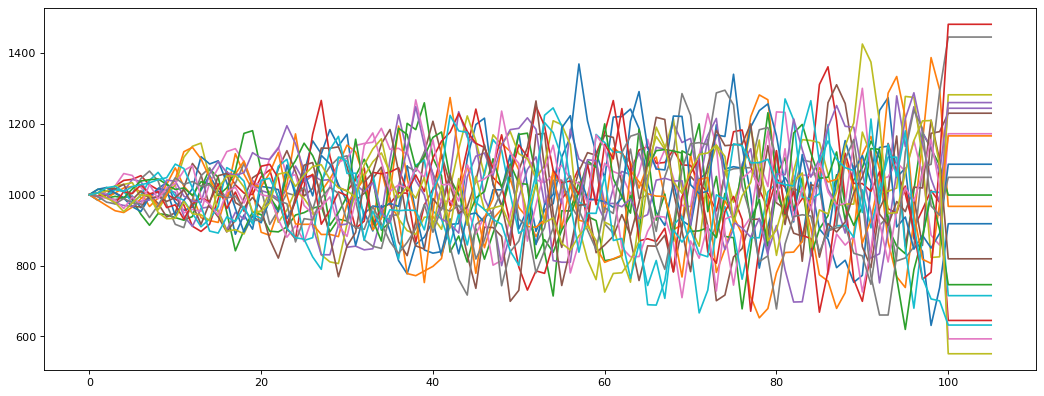

In [43]:
x = range(games+1+5)
y1 = Conv([i[0][1] for i in Match_history], games+1)
y2 = Conv([i[1][1] for i in Match_history], games+1)
y3 = Conv([i[2][1] for i in Match_history], games+1)
y4 = Conv([i[3][1] for i in Match_history], games+1)
y5 = Conv([i[4][1] for i in Match_history], games+1)
y6 = Conv([i[5][1] for i in Match_history], games+1)
y7 = Conv([i[6][1] for i in Match_history], games+1)
y8 = Conv([i[7][1] for i in Match_history], games+1)
y9 = Conv([i[8][1] for i in Match_history], games+1)
y10 = Conv([i[9][1] for i in Match_history], games+1)
y11 = Conv([i[10][1] for i in Match_history], games+1)
y12 = Conv([i[11][1] for i in Match_history], games+1)
y13 = Conv([i[12][1] for i in Match_history], games+1)
y14 = Conv([i[13][1] for i in Match_history], games+1)
y15 = Conv([i[14][1] for i in Match_history], games+1)
y16 = Conv([i[15][1] for i in Match_history], games+1)
y17 = Conv([i[16][1] for i in Match_history], games+1)
y18 = Conv([i[17][1] for i in Match_history], games+1)
y19 = Conv([i[18][1] for i in Match_history], games+1)
y20 = Conv([i[19][1] for i in Match_history], games+1)


figure(figsize=(16, 6), dpi=80)

plt.plot(x, y1+5*[y1[-1]], label = "Player 1")
plt.plot(x, y2+5*[y2[-1]], label = "Player 2")
plt.plot(x, y3+5*[y3[-1]], label = "Player 3")
plt.plot(x, y4+5*[y4[-1]], label = "Player 4")
plt.plot(x, y5+5*[y5[-1]], label = "Player 5")
plt.plot(x, y6+5*[y6[-1]], label = "Player 6")
plt.plot(x, y7+5*[y7[-1]], label = "Player 7")
plt.plot(x, y8+5*[y8[-1]], label = "Player 8")
plt.plot(x, y9+5*[y9[-1]], label = "Player 9")
plt.plot(x, y10+5*[y10[-1]], label = "Player 10")
plt.plot(x, y11+5*[y11[-1]], label = "Player 11")
plt.plot(x, y12+5*[y12[-1]], label = "Player 12")
plt.plot(x, y13+5*[y13[-1]], label = "Player 13")
plt.plot(x, y14+5*[y14[-1]], label = "Player 14")
plt.plot(x, y15+5*[y15[-1]], label = "Player 15")
plt.plot(x, y16+5*[y16[-1]], label = "Player 16")
plt.plot(x, y17+5*[y17[-1]], label = "Player 17")
plt.plot(x, y18+5*[y18[-1]], label = "Player 18")
plt.plot(x, y19+5*[y19[-1]], label = "Player 19")
plt.plot(x, y20+5*[y20[-1]], label = "Player 20")
#plt.legend()
plt.show()

In [47]:
print('Final ranking: '+ str([i.name for i in ranked(players)]))
print('Real ranking: ' + str([i.name for i in ranked_true(players)]) )

Final ranking: ['p9', 'p3', 'p19', 'p10', 'p16', 'p14', 'p13', 'p12', 'p11', 'p2', 'p17', 'p7', 'p8', 'p4', 'p20', 'p1', 'p6', 'p5', 'p18', 'p15']
Real ranking: ['p9', 'p10', 'p3', 'p19', 'p16', 'p14', 'p13', 'p12', 'p11', 'p2', 'p17', 'p7', 'p8', 'p4', 'p6', 'p20', 'p1', 'p5', 'p18', 'p15']
